<a href="https://colab.research.google.com/github/suhasAB/Numpy-Stack/blob/main/Pandas/donut_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
hole_rad=2
max_rad=8
samples=2000
rad=(np.random.random(samples)*max_rad)+hole_rad


In [3]:
x1=(np.random.random(samples)*2*rad)-rad
x2=np.sqrt((np.power(rad,2))-(np.power(x1,2)))
x2[:1000]*= -1
y=np.ones(samples)

In [4]:
y=np.sqrt((np.power(x2,2))+(np.power(x1,2)))
y[y>7]=0


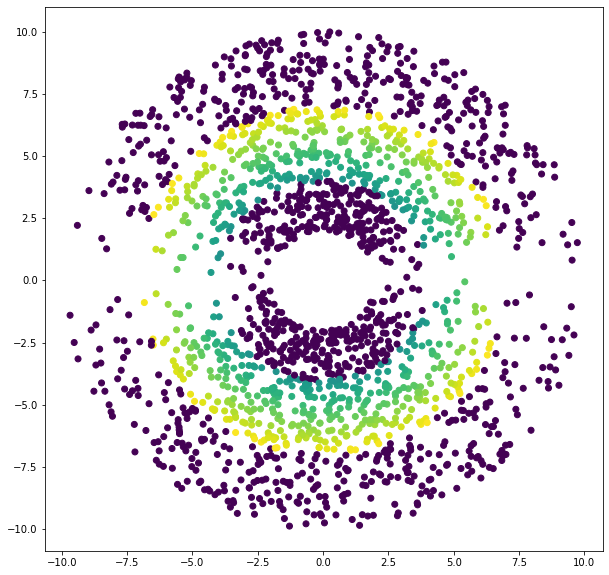

In [5]:
y[y<4]=1
plt.figure(figsize=(10,10))
plt.scatter(x1,x2,c=y);

In [6]:
hole_rad1=2.5
max_rad1=2
hole_rad2=5
max_rad2=3
samples=2000
samples2=5000
rad1=(np.random.random(samples)*max_rad1)+hole_rad1
rad2=(np.random.random(samples2)*max_rad2)+hole_rad2

x11=(np.random.random(samples)*2*rad1)-rad1
x21=np.sqrt((np.power(rad1,2))-(np.power(x11,2)))
x21[:1000]*= -1
y1=np.zeros(samples)

x12=(np.random.random(samples2)*2*rad2)-rad2
x22=np.sqrt((np.power(rad2,2))-(np.power(x12,2)))
x22[:2500]*= -1
y2=np.ones(samples2)

xx=np.concatenate((x11,x12))
yy=np.concatenate((x21,x22))
y=np.concatenate((y1,y2))

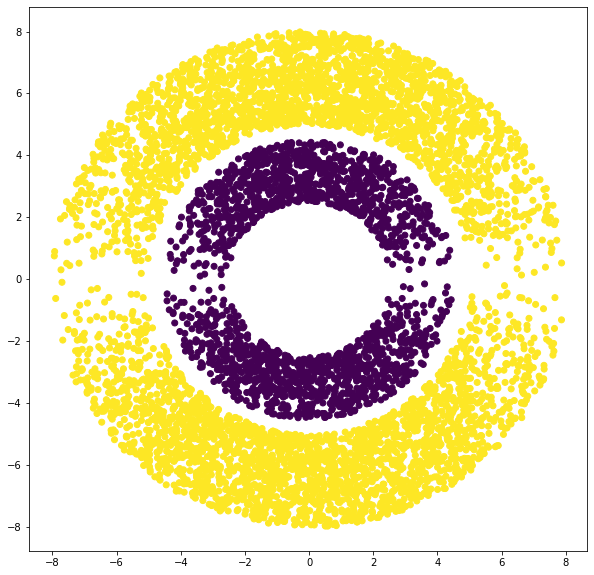

In [7]:
plt.figure(figsize=(10,10))
plt.scatter(xx,yy,c=y);

In [8]:
xx.shape,yy.shape,y.shape

((7000,), (7000,), (7000,))

In [9]:
df=pd.DataFrame({'x':xx,'y':yy,'color':y})
df.head()

,x,y,color
0,-2.373158,-3.614948,0.0
1,0.080009,-3.566659,0.0
2,-3.676018,-1.239193,0.0
3,-3.681296,-2.359370,0.0
4,-1.174485,-4.169803,0.0


In [10]:
df.columns

Index(['x', 'y', 'color'], dtype='object')

In [11]:
def num_square_x(row):
  return float(np.power(row['x'],2))

def num_square_y(row):
  return float(np.power(row['y'],2))

def num_xy(row):
  return float(row['x']*row['y'])


df['X1^2']=df.apply(num_square_x,axis=1)
df['Y1^2']=df.apply(num_square_y,axis=1)
df['X*Y']=df.apply(num_xy,axis=1)
df.tail()

,x,y,color,X1^2,Y1^2,X*Y
6995,-2.721460,7.134934,1.0,7.406342,50.907285,-19.417435
6996,3.276955,6.228546,1.0,10.738435,38.794782,20.410665
6997,4.392969,2.832408,1.0,19.298177,8.022534,12.442679
6998,4.861546,2.093430,1.0,23.634626,4.382448,10.177304
6999,-3.547505,3.611980,1.0,12.584793,13.046403,-12.813519


In [16]:
df.to_csv('output.csv',index=False)

In [17]:
ddf = pd.read_csv('output.csv')

In [18]:
ddf.head()

,x,y,color,X1^2,Y1^2,X*Y
0,-2.373158,-3.614948,0.0,5.631880,13.067846,8.578843
1,0.080009,-3.566659,0.0,0.006401,12.721057,-0.285365
2,-3.676018,-1.239193,0.0,13.513109,1.535600,4.555297
3,-3.681296,-2.359370,0.0,13.551939,5.566625,8.685538
4,-1.174485,-4.169803,0.0,1.379416,17.387259,4.897373
